* Autor Danilo Fornari - dfornari@icloud.com

# Projeto Clusterização Clientes

O Foco destre projeto é propor 3 abordagem para clusterização de uma base transacional de clientes
* Modelo RFV ou RFM
* Modelo Hierárquico
* Modelo não Hierárquico

## Importando Bibliotecas

In [112]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
import seaborn as sns
from scipy.stats import chi2_contingency
import os
#Configurando parametros de exibicao do pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Importando dados

In [252]:
#Importando dados para o DataFrame
rfvdf = pd.read_csv('BaseRFV.csv', sep=';',index_col='id_cliente',decimal=',',thousands='.')
rfvdf

,compras,recencia,valor
id_cliente,,,
1,4,4.9,172.37
2,2,11.0,172.37
3,4,4.7,157.17
4,1,10.2,158.14
5,3,8.9,172.61
...,...,...,...
9874,3,12.0,63.18
9875,3,11.3,234.08
9876,1,10.0,306.37


## Analisando DataFrame de forma superficial

In [253]:
#Verificando o shape
rfvdf.shape

(9878, 3)

In [254]:
#Verificando data types do DF
rfvdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9878 entries, 1 to 9878
Data columns (total 3 columns):
 compras     9878 non-null int64
recencia     9878 non-null float64
valor        9878 non-null float64
dtypes: float64(2), int64(1)
memory usage: 308.7 KB


* Todas as variáveis estão corretamente classificadas

In [255]:
#Verificando dados missing
miss_sum = pd.DataFrame(rfvdf.isnull().sum().sort_values(ascending=False), columns=['Total'])
miss_percent = pd.DataFrame((rfvdf.isnull().sum()/rfvdf.isnull().count()*100), columns=['Porcentagem'])
missfulldf = pd.concat([miss_sum,miss_percent],axis=1)
print(missfulldf[missfulldf['Total']>0])
print('\n********TOTALS**********\n',missfulldf[missfulldf['Total']>0].count())

Empty DataFrame
Columns: [Total, Porcentagem]
Index: []

********TOTALS**********
 Total          0
Porcentagem    0
dtype: int64


/Library/Python/3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


* Não existem dados missing

In [256]:
#Verificando dados =  0
zr_sum = pd.DataFrame(rfvdf[(rfvdf==0)].sum().sort_values(ascending=False), columns=['Total'])
zr_percent = pd.DataFrame((rfvdf[(rfvdf==0)].sum()/rfvdf.isnull().count()*100), columns=['Porcentagem'])
zrfulldf = pd.concat([zr_sum,zr_percent],axis=1)
print(missfulldf[zrfulldf['Total']>0])
print('\n********TOTALS**********\n',zrfulldf[zrfulldf['Total']>0].count())

Empty DataFrame
Columns: [Total, Porcentagem]
Index: []

********TOTALS**********
 Total          0
Porcentagem    0
dtype: int64


/Library/Python/3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


* Não existem dados com valor igual a zero

In [257]:
#Verificando dados estatísticos das variáveis
rfvdf.describe().T

,count,mean,std,min,25%,50%,75%,max
compras,9878.0,2.584228,1.813336,1.00,1.0000,2.00,3.0000,10.0
recencia,9878.0,7.708813,2.209771,1.00,6.3000,7.75,9.5000,12.0
valor,9878.0,250.748540,126.340006,60.86,157.9575,231.70,305.7525,641.1


* Parece haver uma boa distribuição entre as variáveis

In [258]:
#Verificando se existe alguma aglutinação de valores
for i in rfvdf.columns:
    print('***** ',i, '******\n')
    print(rfvdf[i].value_counts(),'\n')

*****   compras  ******

1     3285
2     2371
3     2063
4     1306
5      250
9      162
6      120
7      113
8      106
10     102
Name:  compras , dtype: int64 

*****  recencia ******

7.00     458
8.00     450
10.00    422
9.00     414
6.50     283
        ... 
9.15       8
1.00       7
8.15       7
7.25       7
9.65       5
Name: recencia, Length: 142, dtype: int64 

*****  valor ******

140.40    6
169.30    6
217.00    6
168.93    6
254.97    5
         ..
60.86     1
119.41    1
167.76    1
577.10    1
202.82    1
Name: valor, Length: 6891, dtype: int64 



## Análise das variáveis

/Library/Python/3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Python/3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Library/Python/3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/Library/Python/3.7/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprec

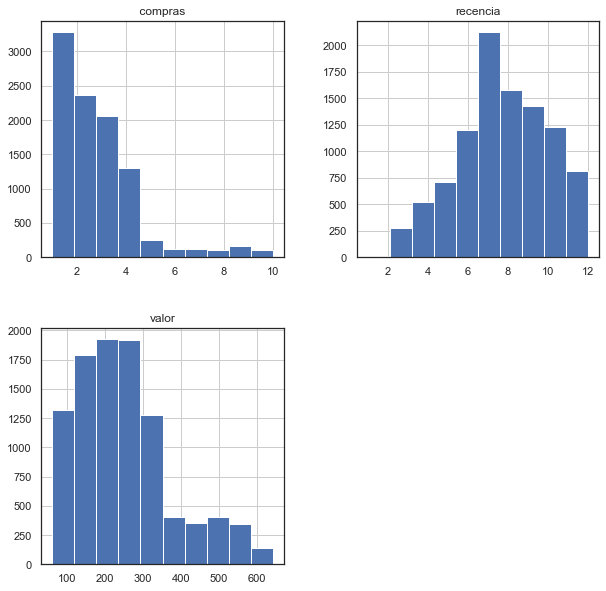

In [259]:
#Histograma
rfvdf.hist(figsize=(10,10))
plt.show()

* Variável compras tem forte assimetria à direita
* Variável Valor tem assimetria a direita

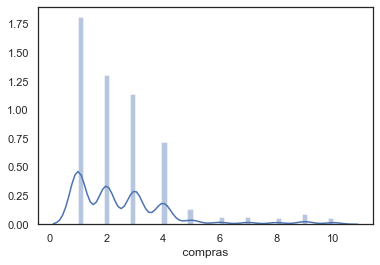

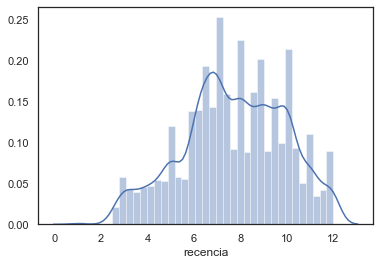

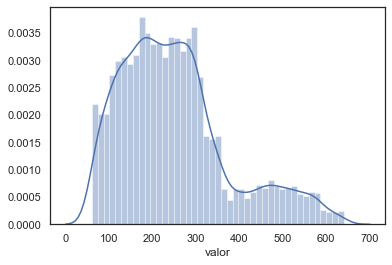

In [260]:
#Gráfico de distribuição
for i in rfvdf.columns:
    sns.distplot(rfvdf[i])
    plt.show()

* A Maioria dos clientes gasta menos que 400 reais e faz menos de 5 compras
* A Recencia é na maioria acima de 6

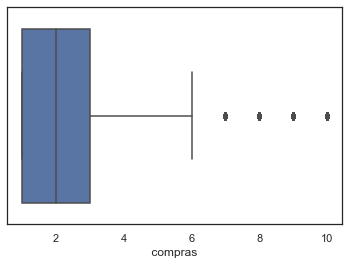

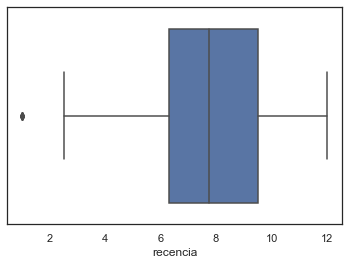

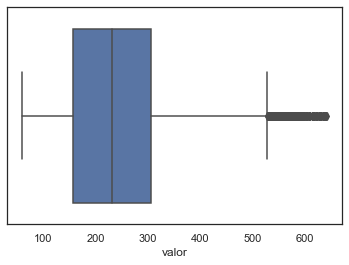

In [261]:
#Gráfico BoxPlot
for i in rfvdf.columns:
    sns.boxplot(rfvdf[i])
    plt.show()

* Como as assimetrias já indicavam, existem outliers em todas as variáveis

# Engenharia de dados

In [262]:
# Verificando assimetrias
assim_var = rfvdf.apply(lambda x:x.skew()).sort_values(ascending=False)
assim_var

 compras     1.860964
valor        0.914703
recencia    -0.198007
dtype: float64

In [263]:
#Normalizando variáveis assimétricas
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

alta_assim = assim_var[assim_var>0.5].index

#Normalizando
for a in alta_assim:
    box_lambda = boxcox_normmax(rfvdf[a])
    print('Variável:, ',a,' LAMBDA: ', box_lambda)
    rfvdf2 = rfvdf.copy()
    rfvdf2[a] = boxcox1p(rfvdf2[a], box_lambda)
    
assim_var2 = rfvdf2.apply(lambda x:x.skew()).sort_values(ascending=False)
assim_var2

Variável:,   compras   LAMBDA:  0.08455370176886517
Variável:,  valor  LAMBDA:  0.1941341421800767


 compras     1.860964
valor       -0.010183
recencia    -0.198007
dtype: float64

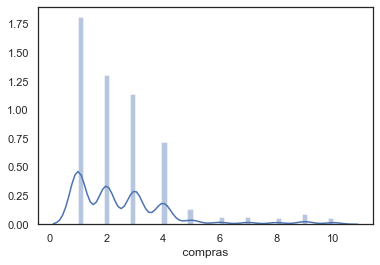

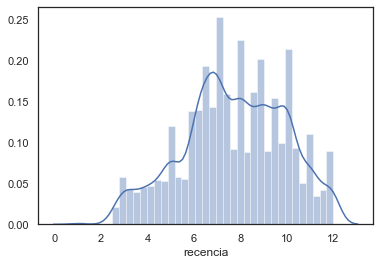

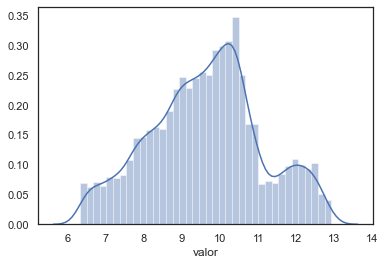

In [280]:
#Gráfico de distribuição
for i in rfvdf.columns:
    sns.distplot(rfvdf2[i])
    plt.show()

In [278]:
#Verificando outliers
from scipy.stats import zscore
z_score = np.abs(zscore(rfvdf2))
droplist= (z_score>3)
print('Porcetagem de outliers na base\n',rfvdf2[droplist].count()/rfvdf2.count()*100)
rfvdf3 = rfvdf2.copy()
#Droppando outliers
rfvdf3.drop(rfvdf3[droplist].index,inplace=True)

print('\n\nShape da base antes de droppar outliers: ', rfvdf2.shape)
print('Shape da base após de droppar outliers: ', rfvdf3.shape)

Porcetagem de outliers na base
  compras     2.74347
recencia     2.74347
valor        2.74347
dtype: float64


Shape da base antes de droppar outliers:  (9878, 3)
Shape da base após de droppar outliers:  (9607, 3)


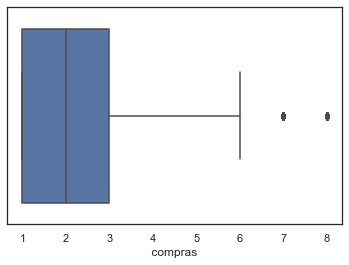

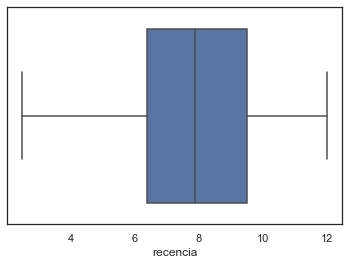

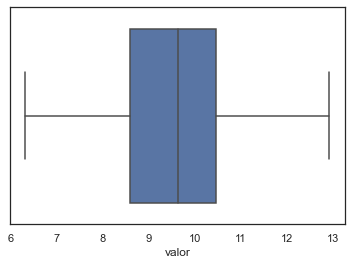

In [279]:
#Gráfico BoxPlot
for i in rfvdf3.columns:
    sns.boxplot(rfvdf3[i])
    plt.show()

## Verificando correlação entre as variáveis

Técnicas não supervisionadas não necessáriamente precisam trabalhar com variáveis fortemente correlacionadas, contudo é importante entender a correlação entre elas para trabalhar de forma eficiênte

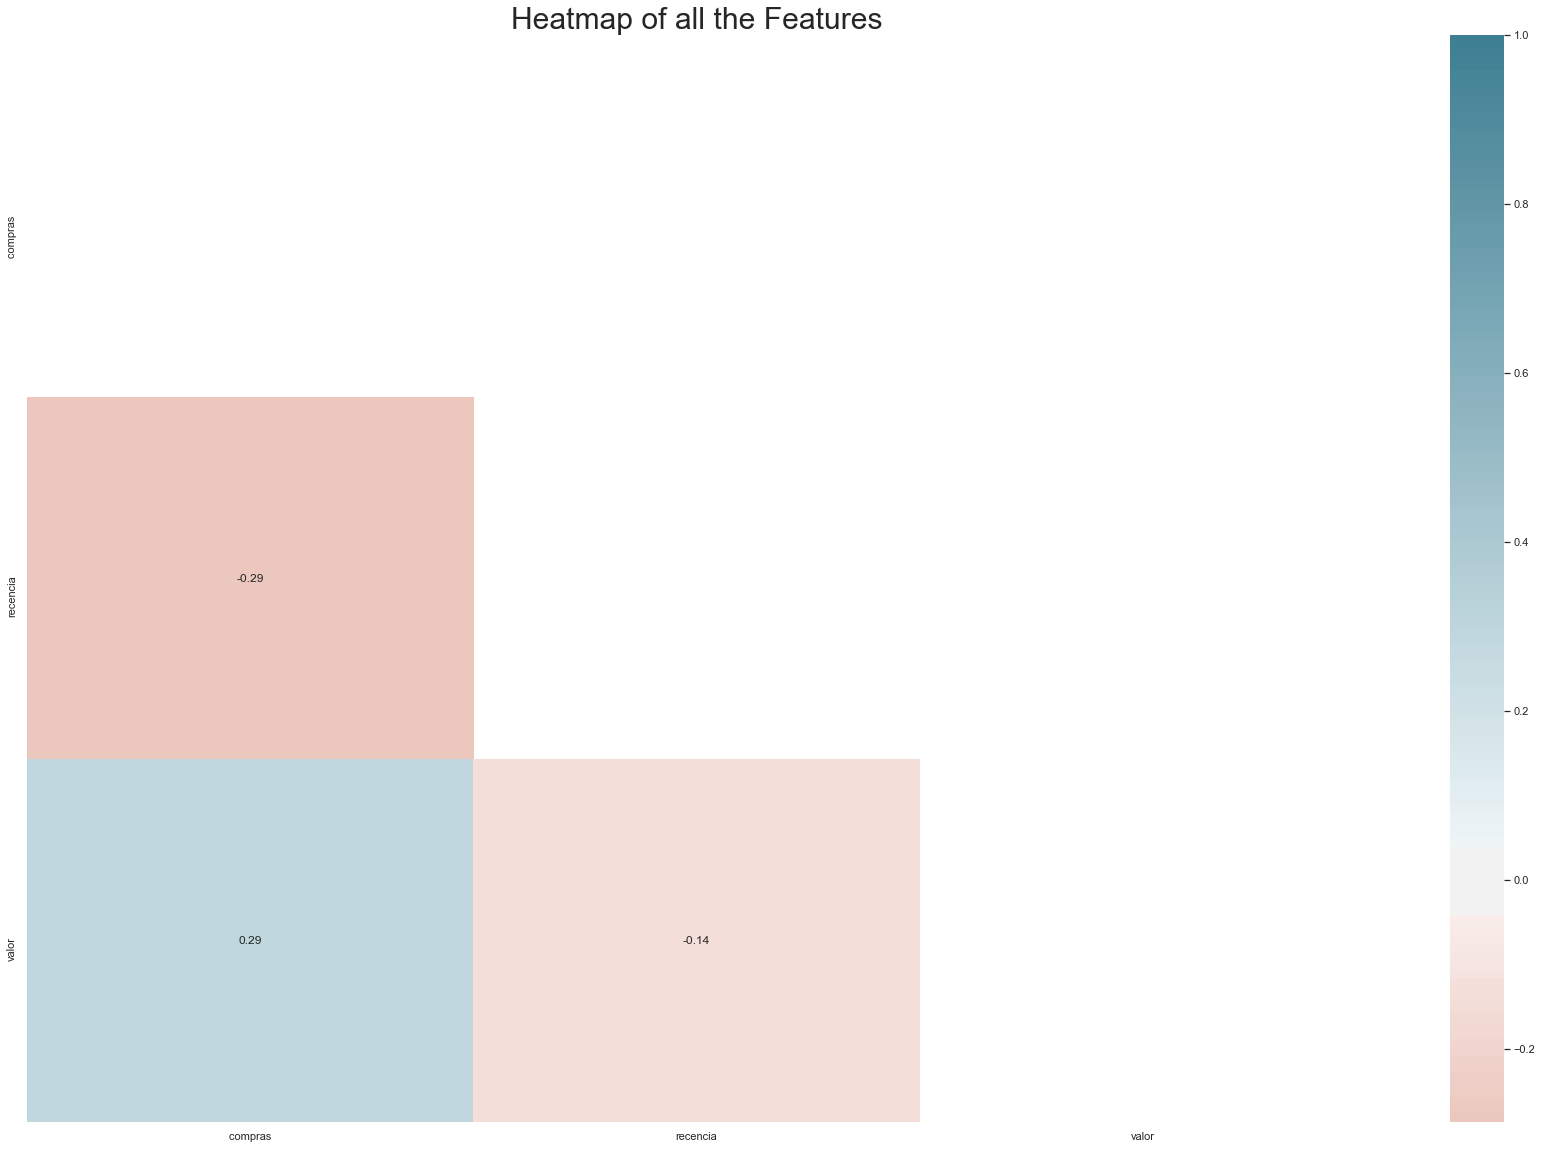

In [289]:
#Gráfico de correlação
#Preparando o canvas
plt.subplots(figsize=(30,20))

#Gerando máscara triangular para apagar trianngulo de cima
mask = np.zeros_like(rfvdf3.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(rfvdf3.corr(),mask=mask, annot=True, center = 0,cmap=sns.diverging_palette(20, 220, n=200))
plt.title("Heatmap of all the Features", fontsize = 30)
plt.show()

# Aplicação do Algoritmo

## Metodo Elbow e K-Means

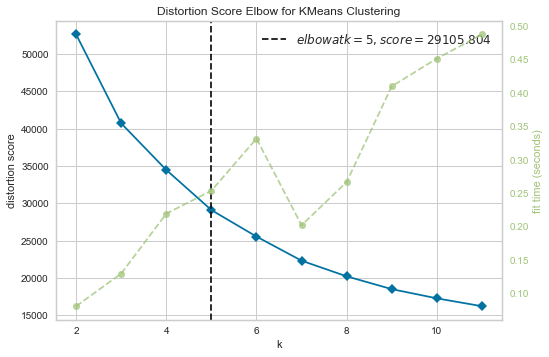

In [363]:
#importando bibliotecas
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Definindo e parametrizando o modelo para trabalhar de 2 a 12 clusters
modelo = KMeans()
visualizador = KElbowVisualizer(modelo, k=(2,12))

#Treinando e imprimindo o resultado
visualizador.fit(rfvdf3.values)        
visualizador.show()   

* O método de elbow nos indica que 5 clusters seria um número ideal, a linha azul representa no eixo Y a diversidade dos clusters e no eixo X o numero de clusters.
* A linha verde representa o tempo de treinamento do modelo escolhido, neste caso o KMeans

In [361]:
#Agora vamos usar o KMeans para fazer a clusterização em 5 clusters
#Importando bibliotecas
from sklearn.cluster import KMeans

#Treinando e prevendo com KMeans
cluster_k = KMeans(n_clusters=5, random_state=random_state).fit_predict(rfvdf3)

#Imprimindo Resultados
rfvdf4 = rfvdf3.copy()
rfvdf4['Cluster']= cluster_k
dfplot = rfvdf4.groupby('Cluster').sum()
dfplot

,compras,recencia,valor
Cluster,,,
0,4351,19016.35,17778.482823
1,3494,2597.50,6763.171401
2,5362,25393.90,24479.847513
3,3838,8417.95,14915.687321
4,5981,19567.15,27893.214096


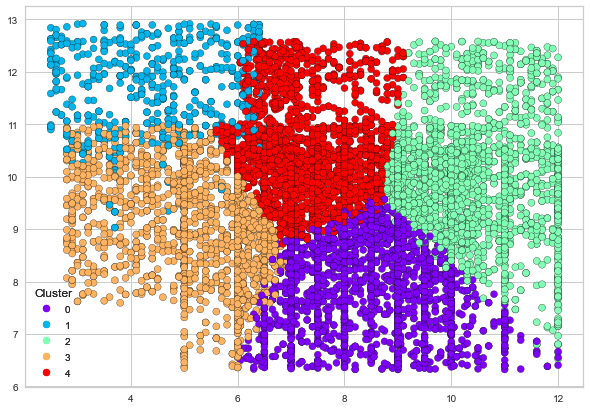

In [390]:
#Imprimindo clusters em um gráfico de dispersão
fig, ax = plt.subplots(figsize=(10, 7))
scatter = ax.scatter(rfvdf3['recencia'], rfvdf3['valor'], c=cluster_k, cmap='rainbow',edgecolors='k')

#Criar Legenda dos Clusters
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Cluster")
ax.add_artist(legend1)

plt.show()

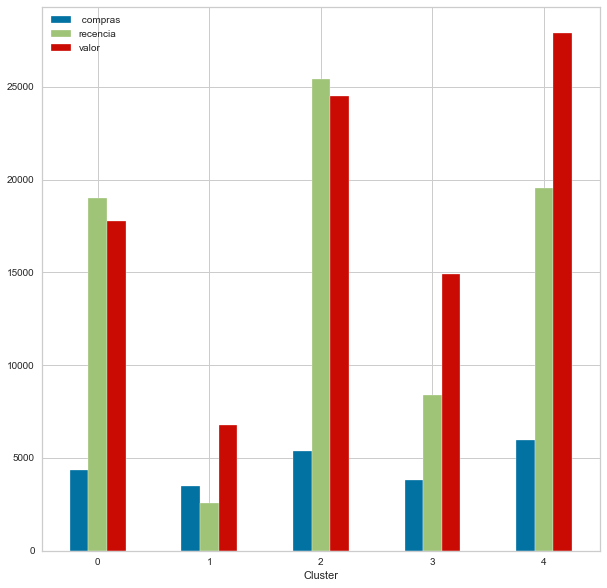

In [362]:
#Imprimindo Resultados em forma de barras
ax = dfplot.plot.bar(rot=0,figsize=(10,10))
plt.show()

* Usamos o algoritmo KMeans para dividir nosso DataFrame em 5 clusters de acordo com nossa análise feita pelo método de Elbow

* Ao Analisar os clusters gerados podemos identificar:
    * O Cluster 4 é um cluster com baixa recência, alto valor e alta frequência, logo seriam os clientes Premium.
    * O Cluster 2 é um grupo de alto valor e alta frequiência, contudo a recencia está alta, seriam possiveis churns da classe premium, é preciso trabalhar com muito foco nesse grupo.
    * O Cluster 0 seriam os clientes exporádicos
    * O Cluster 1 seriam clientes com constantes e bons gastos, poderiam ser trabalhados para conversão em gold ou premium.
    * O Cluster 3 é o cliente padrão gold.

## Cluster hieráquico

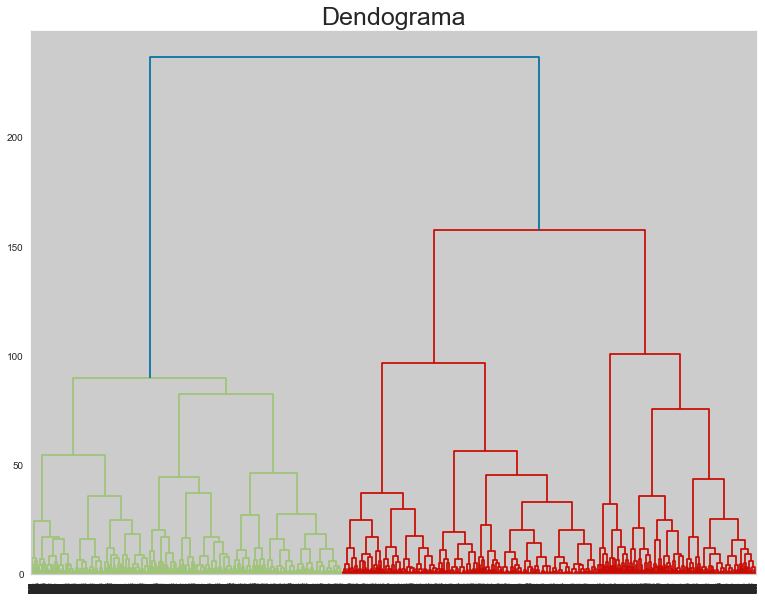

In [529]:
#Criando um dendograma para a base
#Importado Bibliotecas
import scipy.cluster.hierarchy as sch

#Plotando Dendograma
plt.figure(figsize=(13, 10))
plt.title("Dendograma", fontsize = 25)
dend = sch.dendrogram(sch.linkage(rfvdf3, method='ward'))

* Analisando o dendograma é possivel ver que no eixo Y onde vemos as distâncias ou simiralidade dos clusters, na posição entre 50 e 100 teremos a divisão dos 5 clusters escolhidos no método de Elbow.

## RFV - Recência, Frequência e Valor

In [454]:
#Criando novo DataFrame para renomear as colunas
rfvdf5 = rfvdf3.copy()
rfvdf5.rename(columns={' compras ':'Frequencia','recencia':'Recencia','valor':'Valor'},inplace=True)
rfvdf5

,Frequencia,Recencia,Valor
id_cliente,,,
1,4,4.9,8.862834
2,2,11.0,8.862834
3,4,4.7,8.615410
4,1,10.2,8.631760
5,3,8.9,8.866598
...,...,...,...
9873,1,12.0,10.530424
9874,3,12.0,6.404085
9875,3,11.3,9.716219


In [455]:
#Criando as notas de acordo com os quartis
v_nota = range(1,5)
r_nota = range(4,0,-1)

#Aplicando as notas no dataframe de acordo com os quartis
r_grupo = pd.qcut(rfvdf5['Recencia'],4,labels=r_nota)
v_grupo = pd.qcut(rfvdf5['Valor'], 4, labels=v_nota)
rfvdf5=rfvdf5.assign(R = r_grupo.values, V = v_grupo )

In [461]:
#Criando dicionario para mapear frequencia
f_nota={1:1,2:1,3:2,4:2,5:3,6:3,7:4,8:4}
rfvdf5['F']= rfvdf5['Frequencia'].map(f_nota)
rfvdf5

,Frequencia,Recencia,Valor,R,V,F
id_cliente,,,,,,
1,4,4.9,8.862834,4,2,2
2,2,11.0,8.862834,1,2,1
3,4,4.7,8.615410,4,2,2
4,1,10.2,8.631760,1,2,1
5,3,8.9,8.866598,2,2,2
...,...,...,...,...,...,...
9873,1,12.0,10.530424,1,4,1
9874,3,12.0,6.404085,1,1,2
9875,3,11.3,9.716219,1,3,2


In [481]:
#Criando a coluna de valores concatenados
rfvdf5['RFV_Concatenado']= rfvdf5.apply(lambda x:str(x['R'])+str(x['F'])+str(x['V']),axis=1)
rfvdf5

,Frequencia,Recencia,Valor,R,V,F,RFV_Concatenado
id_cliente,,,,,,,
1,4,4.9,8.862834,4,2,2,422
2,2,11.0,8.862834,1,2,1,112
3,4,4.7,8.615410,4,2,2,422
4,1,10.2,8.631760,1,2,1,112
5,3,8.9,8.866598,2,2,2,222
...,...,...,...,...,...,...,...
9873,1,12.0,10.530424,1,4,1,114
9874,3,12.0,6.404085,1,1,2,121
9875,3,11.3,9.716219,1,3,2,123


In [483]:
#Criando a coluna de valores somados
rfvdf5['RFV_Soma']= rfvdf5.apply(lambda x:x['R']+x['F']+x['V'],axis=1)
rfvdf5

,Frequencia,Recencia,Valor,R,V,F,RFV_Concatenado,RFV_Soma
id_cliente,,,,,,,,
1,4,4.9,8.862834,4,2,2,422,8
2,2,11.0,8.862834,1,2,1,112,4
3,4,4.7,8.615410,4,2,2,422,8
4,1,10.2,8.631760,1,2,1,112,4
5,3,8.9,8.866598,2,2,2,222,6
...,...,...,...,...,...,...,...,...
9873,1,12.0,10.530424,1,4,1,114,6
9874,3,12.0,6.404085,1,1,2,121,4
9875,3,11.3,9.716219,1,3,2,123,6


In [525]:
#Criando uma TAG para cada range
# Define rfm_level function
def rfv_tag(df):
    if df['RFV_Soma'] >= 11:
        return 'Premium'
    elif ((df['RFV_Soma'] >= 9) and (df['RFV_Soma'] < 11)):
        return 'Gold'
    elif ((df['RFV_Soma'] >= 7) and (df['RFV_Soma'] < 9)):
        return 'Silver'
    elif ((df['RFV_Soma'] >= 5) and (df['RFV_Soma'] < 7)):
        return 'Normal'
    else:
        return 'Exporádico'
# Create a new variable RFM_Level
rfvdf5['RFV_TAG'] = rfvdf5.apply(rfv_tag, axis=1)
rfvdf5

,Frequencia,Recencia,Valor,R,V,F,RFV_Concatenado,RFV_Soma,RFV_TAG
id_cliente,,,,,,,,,
1,4,4.9,8.862834,4,2,2,422,8,Silver
2,2,11.0,8.862834,1,2,1,112,4,Exporádico
3,4,4.7,8.615410,4,2,2,422,8,Silver
4,1,10.2,8.631760,1,2,1,112,4,Exporádico
5,3,8.9,8.866598,2,2,2,222,6,Normal
...,...,...,...,...,...,...,...,...,...
9873,1,12.0,10.530424,1,4,1,114,6,Normal
9874,3,12.0,6.404085,1,1,2,121,4,Exporádico
9875,3,11.3,9.716219,1,3,2,123,6,Normal


In [526]:
#Verificando valores por grupo
rfv_agg = rfvdf5.groupby('RFV_TAG').agg({
    'Recencia': 'mean',
    'Frequencia': 'mean',
    'Valor': ['mean', 'sum','count']
}).round(1)
rfv_agg.columns = rfv_agg.columns.droplevel()
rfv_agg.columns = ['Recencia_Media','Frequencia_Media','Valor_Media', 'Valor_Soma','Valor_Cont']

rfv_agg = rfv_agg.sort_values(by='Valor_Cont')
rfv_agg

,Recencia_Media,Frequencia_Media,Valor_Media,Valor_Soma,Valor_Cont
RFV_TAG,,,,,
Premium,4.6,6.4,11.8,5676.3,480
Gold,5.6,3.1,10.8,10042.6,926
Exporádico,9.9,1.7,8.0,11325.3,1411
Silver,7.0,2.4,10.1,30459.4,3030
Normal,8.6,2.0,9.1,34326.9,3760


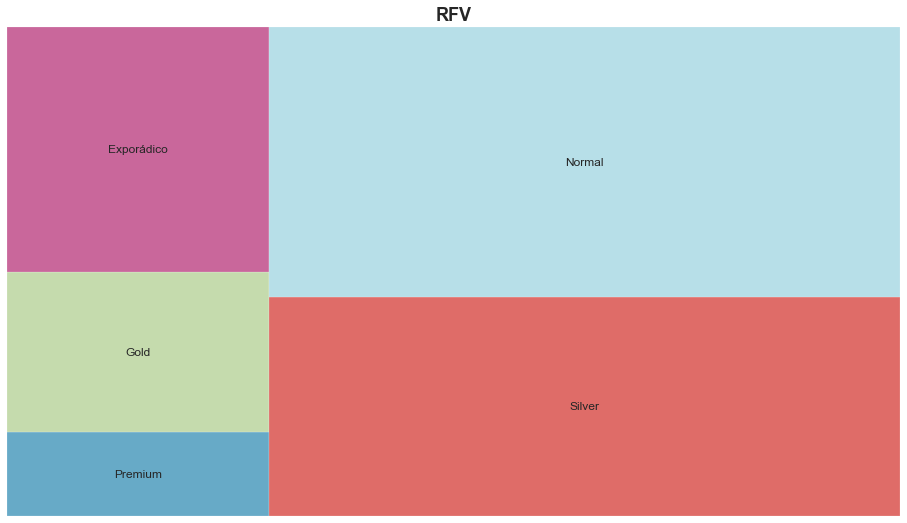

In [528]:
#Verificando resultados de forma gráfica
import squarify

#Criando gráfico
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfv_agg['Valor_Cont'], 
              label=list(rfv_agg.index), alpha=.6, color=['b','g','m','r','c'])
plt.title("RFV",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()